<a href="https://colab.research.google.com/github/Crowley81/Sistemas-y-Se-ales/blob/main/parcial_1_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Punto 1**
Digitalizacion de la señal

x(t) = 0.3cos(1000πt-π/4)+0.6sen(2000πt)+0.1cos(11000πt - π)

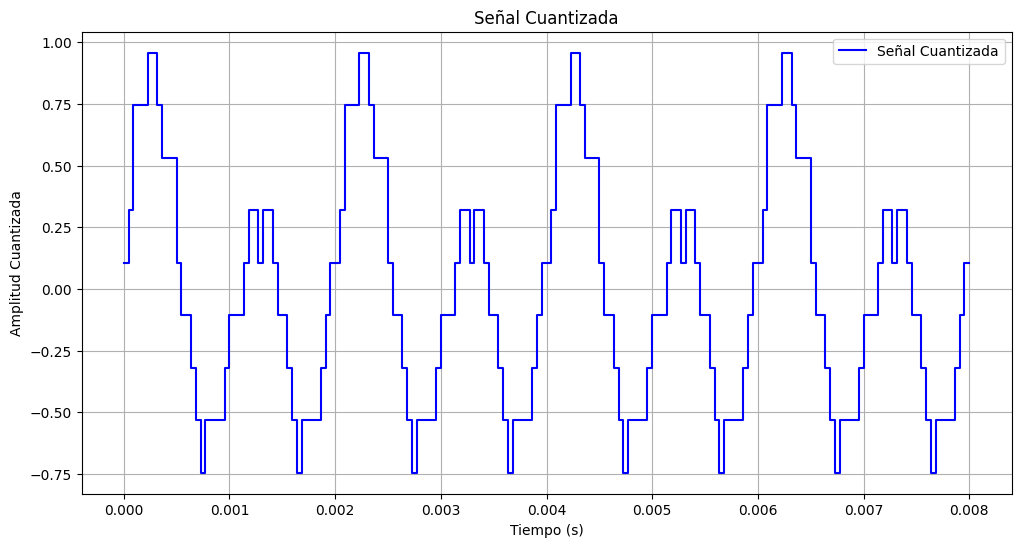

In [ ]:
#Importar librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Función de cuantización
def my_cuantizador(yn, vq): #vq: vector de cuantizacion // yn: valor de la señal a cuantizar
    dn = cdist(yn.reshape(-1, 1), vq.reshape(-1, 1))  # Distancia entre yn y vq
    ind = np.argmin(dn)
    return vq[ind]

# Parámetros de la señal
Fs = 22000  # Frecuencia de muestreo
Fo1 = 500  # Frecuencia componente 1
Fo2 = 1000  # Frecuencia componente 2
Fo3 = 5500  # Frecuencia componente 3
T = 1 / Fo1  # Periodo del componente de frecuencia más baja
duracion = 4 * T  # Duración de 4 ciclos
Ts = 1 / Fs  # Período de muestreo

# Parámetros de cuantización
nbits = 5  # Numero de bits
rmin = -3.3  # Rango minimo del conversor
rmax = 3.3  # Rango maximo del conversor
ve = np.linspace(rmin, rmax, 2**nbits)

# Vector de tiempo discreto
tv_disc = np.arange(0, duracion, Ts)

# Señal discretizada
xv_disc = 0.3 * np.cos(1000 * np.pi * tv_disc - np.pi / 4) + 0.6 * np.sin(2000 * np.pi * tv_disc) + 0.1 * np.cos(11000 * np.pi * tv_disc - np.pi)
#tv_disc = haces las veces de N que es donde se toma la muestra

# Cuantización
xv_cuant = []
for xv in xv_disc:
    cuantizado = my_cuantizador(np.array([xv]), ve)
    xv_cuant.append(cuantizado)

xv_cuant = np.array(xv_cuant) # Convertimos la lista a un array de numpy

# Graficar señal cuantizada

plt.figure(figsize=(12, 6))
plt.step(tv_disc, xv_cuant, label="Señal Cuantizada", color='b', where='post')
plt.title("Señal Cuantizada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud Cuantizada")
plt.grid()
plt.legend()
plt.show()


Para realizar este ejercicio se implento la ayuda de una IA para la parte final del codigo, la que se encarga de la grafica de la funcion, los prompts utilizados fueron:
* el codigo anterior hace parte de un ejercicio de la materia universitaria Sistemas y señales, este codigo hace parte de un ejercicio por el cual se toma una señal compuesta y es sometida a un proceso de discretizacion y cuantizacion, utilizando la informacion del codigo podrias ayudarme a crear una ultima seccion para el mismo, que se encargue de mostrar la señal cuantizada utilizando la libreria: matplotlib (antes de esta pregunta habia copiado y pegado el codigo para que la IA lo analice)

*Iteracion: solo necesito la grafica de la señal cuantizada

2 punto Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

x[n]=sin[100πn]+sin[600πn]

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2025-02-13 01:44:45--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 172.253.62.100, 172.253.62.102, 172.253.62.138, ...
Connecting to docs.google.com (docs.google.com)|172.253.62.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2025-02-13 01:44:45--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 0s

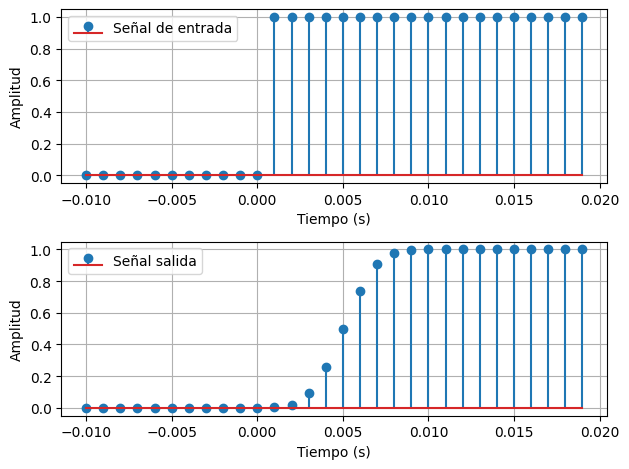

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u_one = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u_one)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u_one, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Primero vamos a verificar que el sistema es SLIT mirando si cumple la linealidad y la invariancia en el tiempo

Linealidad: y(t)=H{a1x1(t)+a2x2(t)}=a1H{x1(t)}+a2H{x2(t)}

Invariancia con el tiempo: y(t)=H{x(t)};y(t−to)=H{x(t−to)}



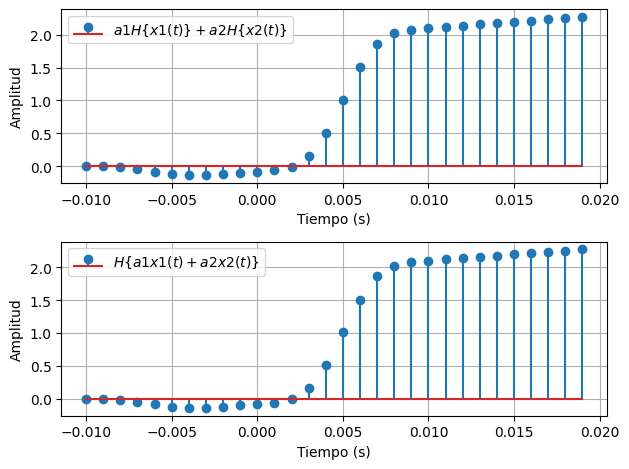

In [ ]:
#Primero verificamos la linealidad del sistema con otra señal
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo

a_1 = 2   #primer escalar
a_2 = 3   #segundo escalar

signal_u = np.heaviside(t,1) # función heaviside (escalon)
signal_u_scaled = a_1*signal_u  # función heaviside ya escalada
y_u = my_system.predict(signal_u)
y_u_scaled = my_system.predict(signal_u_scaled)

signal_v = np.sin(2*np.pi*t) #señal con la que se compara - funcion seno
signal_v_scaled = a_2*signal_v #funcion seno escalada
y_v = my_system.predict(signal_v) # respuesta sistema
y_v_scaled = my_system.predict(signal_v_scaled) #respuesta al sistema de funciones escaladas
signals_scaled= signal_u_scaled + signal_v_scaled #suma de las funciones escaladas
P1 = a_1*y_u + a_2*y_v #verificar linealidad
P2 = y_u_scaled + y_v_scaled # verificar linealidad

# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, P1, label='$a1H\{x1(t)\}+a2H\{x2(t)\}$')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,P2, label='$H \{a1x1(t)+a2x2(t)\}$')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

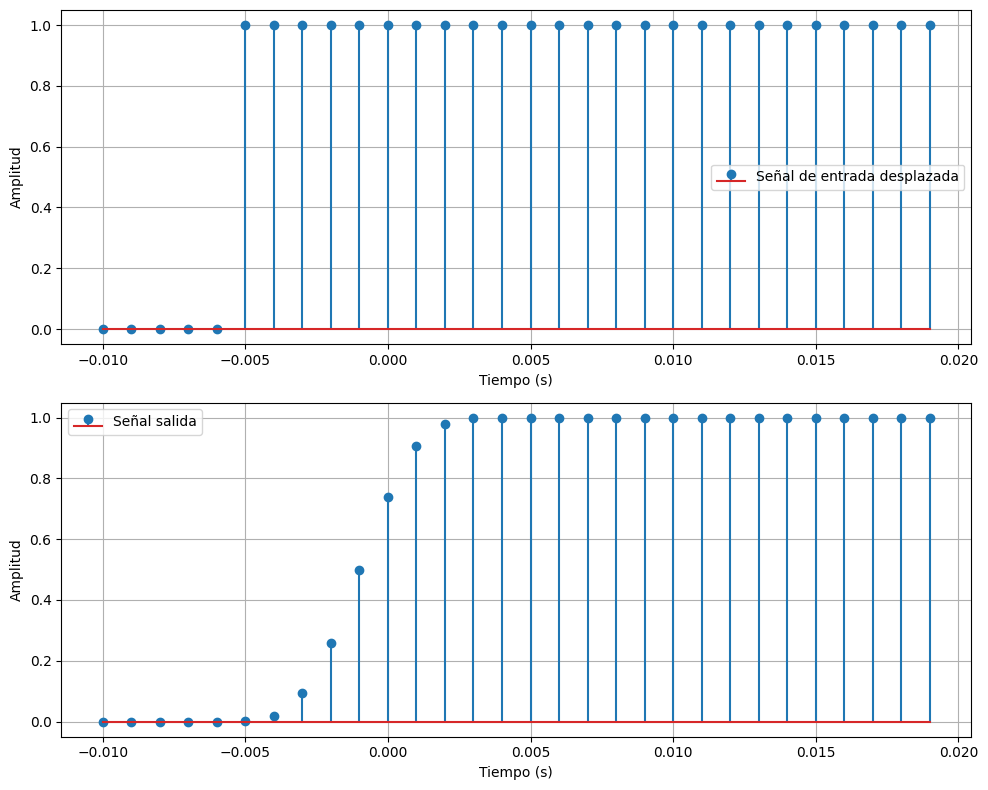

In [ ]:
#verificamos la invariancia en el tiempo
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo # crear vector
to = -0.0058 # poner un valor dentro del rango desplazamiento
signal_u = np.heaviside(t-to,1) # función heaviside desplazada
y_u = my_system.predict(signal_u) #respuesta ecalamiento



# Visualización de las señales

fig, axs = plt.subplots(2,1, figsize=(10, 8))
axs[0].stem(t, signal_u, label='Señal de entrada desplazada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

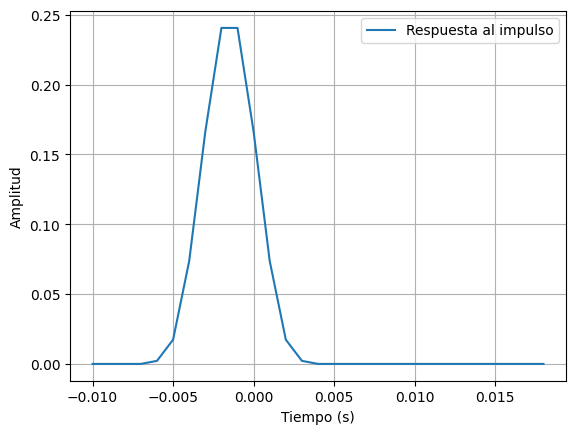

In [ ]:
#ya que se verifico es SLIT vamos a determinar su respuesta al impulso
h_n = np.diff(y_u) #encontramos la respuesta al impulso derivando la salida del sistema
plt.figure()

# Ajustamos el tamaño de t para que coincida con h_n
t_adjusted = t[:-1]  # eliminamos el último elemento de t - IA

plt.plot(t_adjusted, h_n, label='Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

In [ ]:
n = t  #se crea el arreglo n para las muestras


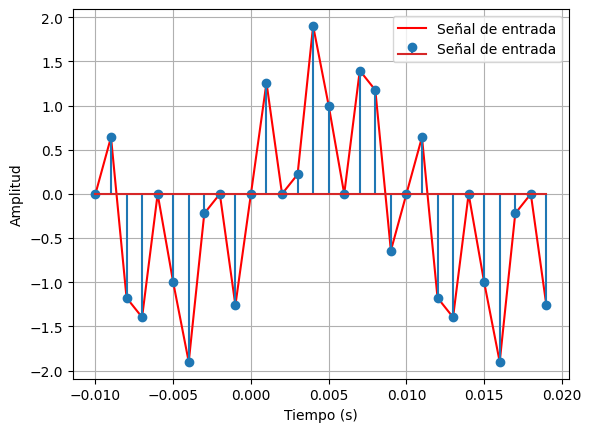

In [ ]:

x_n = np.sin(100 * np.pi * n) + np.sin(600 * np.pi * n) #señal dada en el ejercicio
#señal de entrada
plt.figure()
plt.plot(n, x_n,'r',label='Señal de entrada')
plt.stem(n, x_n, label='Señal de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

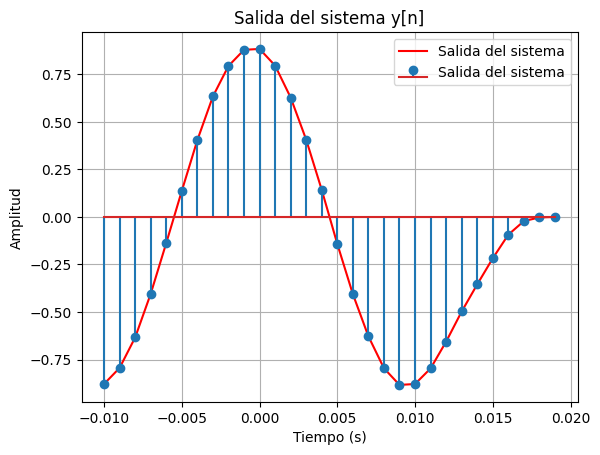

In [ ]:
# Realizar la convolución
y_output = np.convolve(x_n, h_n, mode='same')

# Visualización de la salida
plt.figure()
plt.plot(n, y_output,'r',label='Salida del sistema')
plt.stem(n, y_output[:len(t)], label='Salida del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()